#Dataset
https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Cotton Disease Dataset

/content/drive/MyDrive/Cotton Disease Dataset


In [3]:
from tensorflow.keras.layers import Input, Dense , Flatten ,  Lambda
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

In [4]:
X= 224
Y= 224

train_path = os.getcwd() + '/train'
test_path = os.getcwd() + '/test'
val_path = os.getcwd() + '/val'

In [9]:
inception = InceptionV3(input_shape=(X,Y,3),weights='imagenet',include_top=False)

In [6]:
for layer in resnet.layers:
  layer.trainable=False

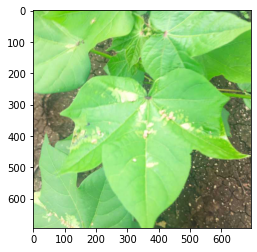

In [7]:
img = load_img(train_path + '/diseased cotton leaf/dis_leaf (1)_iaip.jpg')
plt.imshow(img)
plt.axis('on')
plt.show()

In [10]:
x= Flatten()(inception.output)

In [11]:
prediction = Dense(4 , activation='softmax')(x)

model = Model(inputs=inception.input, outputs = prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics= ['accuracy']
)

In [14]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range= 0.2,
    horizontal_flip = True
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [15]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(X,Y),
    batch_size = 32 ,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(X,Y),
    batch_size = 32 ,
    class_mode = 'categorical'
)

val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(X,Y),
    batch_size = 32 ,
    class_mode = 'categorical'
)


Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
hist = model.fit(
    train_data, 
    validation_data = val_data,
    epochs = 50 ,
    steps_per_epoch = len(train_data),
    validation_steps= len(val_data)
)


In [16]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred)
print(y_pred)